# GRAPE LEAF DISEASE DETECTION AND PESTISIDE RECOMMENDATION

In [1]:
# IMPORTING ALL LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import torch
from torchvision import datasets, transforms

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import pickle

from sklearn.metrics import confusion_matrix

from PIL import Image

C:\Users\chara\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Define transformation for preprocessing images
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Set the directory paths for train and test data
train_data_dir = 'C:\\Users\\chara\\Desktop\\grape_disease_detection_and_pestiside_recommendation\\train'
test_data_dir = 'C:\\Users\\chara\\Desktop\\grape_disease_detection_and_pestiside_recommendation\\test'

# Create datasets for train and test
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=data_transform)
test_dataset = datasets.ImageFolder(root=test_data_dir, transform=data_transform)

# Print information about train dataset
print("Train Dataset:")
print("Number of samples:", len(train_dataset))
print("Number of classes:", len(train_dataset.classes))
print("Class labels:", train_dataset.classes)
print("Shape of the first image tensor:", train_dataset[0][0].shape)
print("Info about the dataset:", train_dataset)

# Print information about test dataset
print("\nTest Dataset:")
print("Number of samples:", len(test_dataset))
print("Number of classes:", len(test_dataset.classes))
print("Class labels:", test_dataset.classes)
print("Shape of the first image tensor:", test_dataset[0][0].shape)
print("Info about the dataset:", test_dataset)


Train Dataset:
Number of samples: 3209
Number of classes: 4
Class labels: ['Black_rot', 'Esca_(Black_Measles)', 'Healthy', 'Leaf_blight_(Isariopsis_Leaf_Spot)']
Shape of the first image tensor: torch.Size([3, 224, 224])
Info about the dataset: Dataset ImageFolder
    Number of datapoints: 3209
    Root location: C:\Users\chara\Desktop\grape_disease_detection_and_pestiside_recommendation\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

Test Dataset:
Number of samples: 880
Number of classes: 4
Class labels: ['Black_rot', 'Esca_(Black_Measles)', 'Healthy', 'Leaf_blight_(Isariopsis_Leaf_Spot)']
Shape of the first image tensor: torch.Size([3, 224, 224])
Info about the dataset: Dataset ImageFolder
    Number of datapoints: 880
    Root location: C:\Users\chara\Desktop\grape_disease_

# creating data loaders

In [3]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


# DATA VISUALIZATION for better understanding

#### visualizing training dataset
**ploting first 5 images in training dataset**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


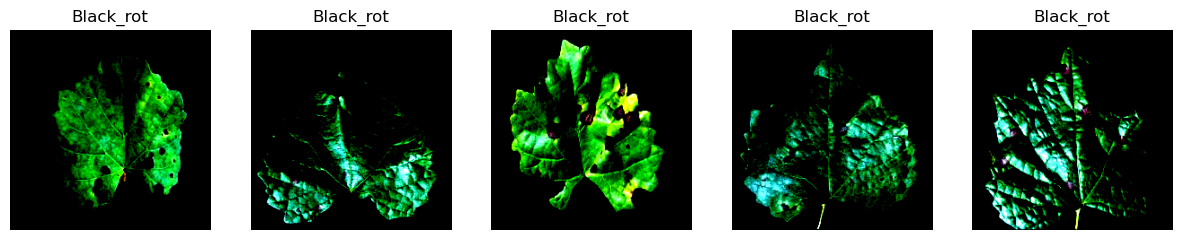

In [4]:
# Define class labels
class_labels = train_dataset.classes

# Plot the first 5 images
plt.figure(figsize=(15, 5))
for i in range(5):
    image, label = train_dataset[i]
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Convert tensor to numpy array and transpose dimensions
    plt.title(class_labels[label])
    plt.axis('off')
plt.show()


#### using function
**ploting first 5 images of each class in training dataset**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

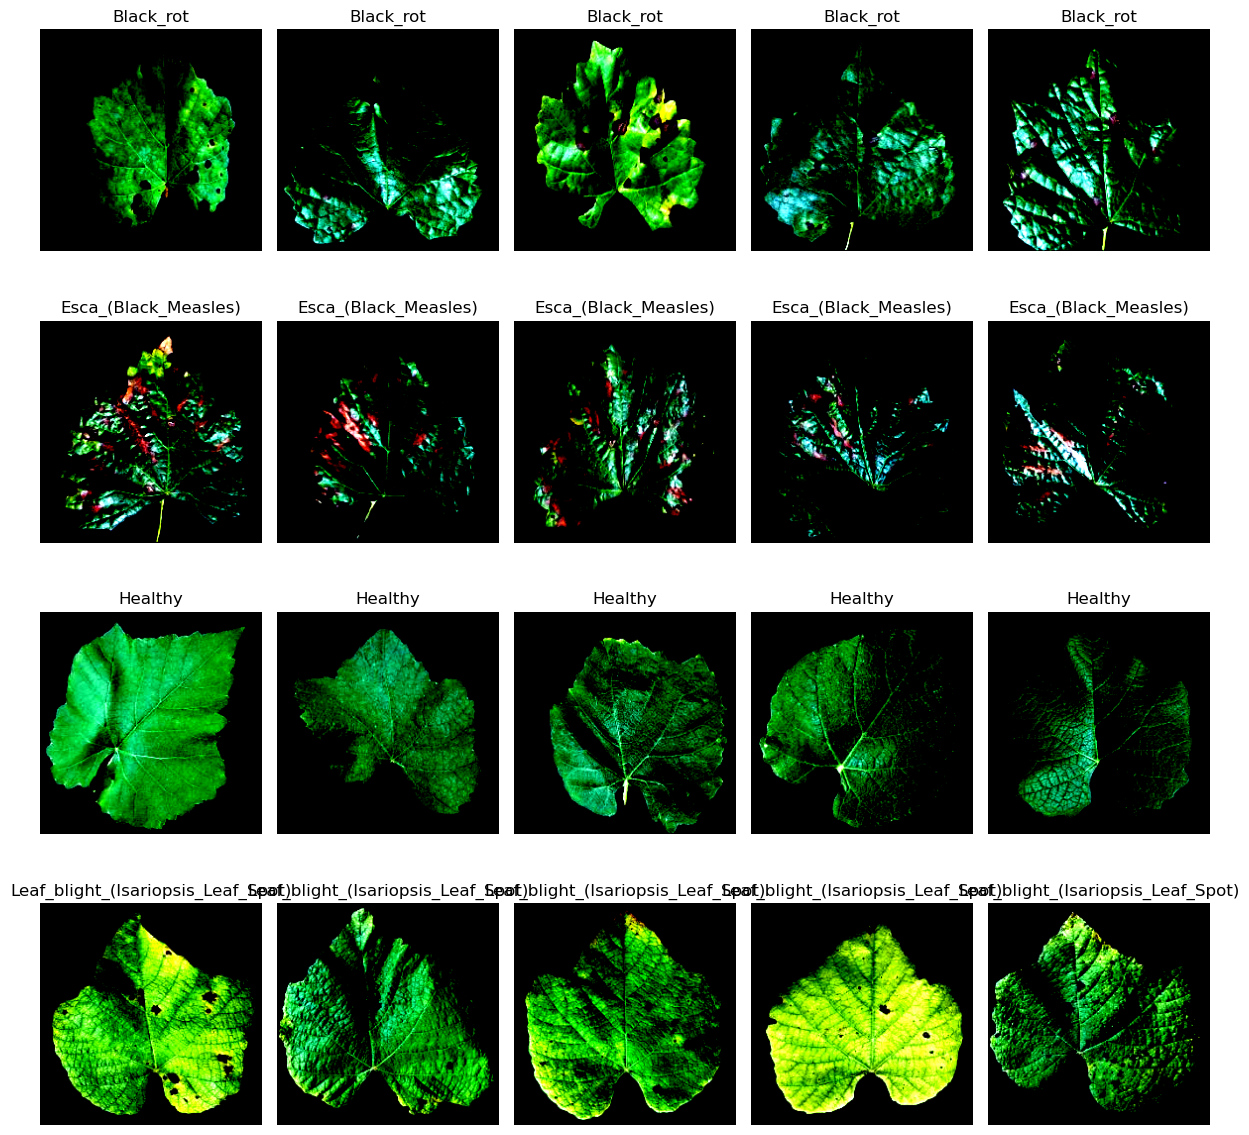

In [5]:
# Function to plot images
def plot_images(dataset, class_names):
    fig, axs = plt.subplots(nrows=len(class_names), ncols=5, figsize=(12, 12))
    for i, class_name in enumerate(class_names):
        class_indices = [idx for idx, label in enumerate(dataset.targets) if label == i]
        for j in range(5):
            img, _ = dataset[class_indices[j]]
            axs[i, j].imshow(img.permute(1, 2, 0))  # Convert from tensor to numpy array and rearrange dimensions
            axs[i, j].set_title(class_name)
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Get class names
class_names = train_dataset.classes

# Plot the first 5 images of each class
plot_images(train_dataset, class_names)

**without using function**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

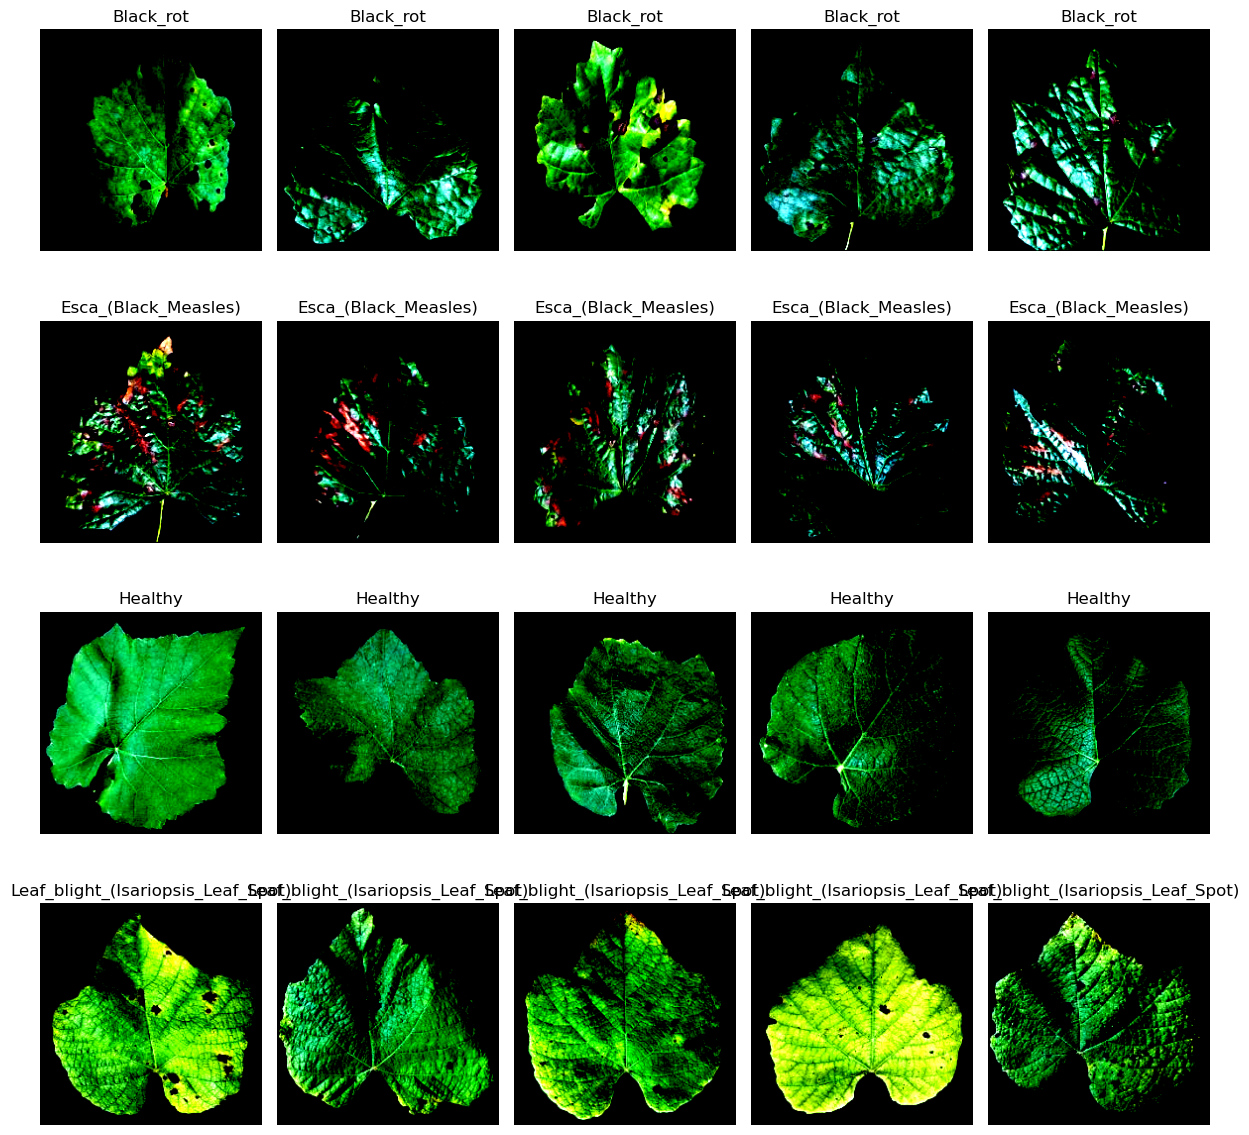

In [6]:
# Get class names
class_names = train_dataset.classes

# Initialize counters for each class
class_counters = {class_name: 0 for class_name in class_names}

# Initialize a dictionary to store the first 5 images for each class
first_images = {class_name: [] for class_name in class_names}

# Iterate through the training dataset to find the first 5 images for each class
for image, label in train_dataset:
    class_name = class_names[label]
    if class_counters[class_name] < 5:
        first_images[class_name].append(image)
        class_counters[class_name] += 1

# Plot the first 5 images for each class
fig, axs = plt.subplots(nrows=len(class_names), ncols=5, figsize=(12, 12))
for i, class_name in enumerate(class_names):
    for j in range(5):
        axs[i, j].imshow(first_images[class_name][j].permute(1, 2, 0))  # Convert from tensor to numpy array and rearrange dimensions
        axs[i, j].set_title(class_name)
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

**randomly generating images of training dataset**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

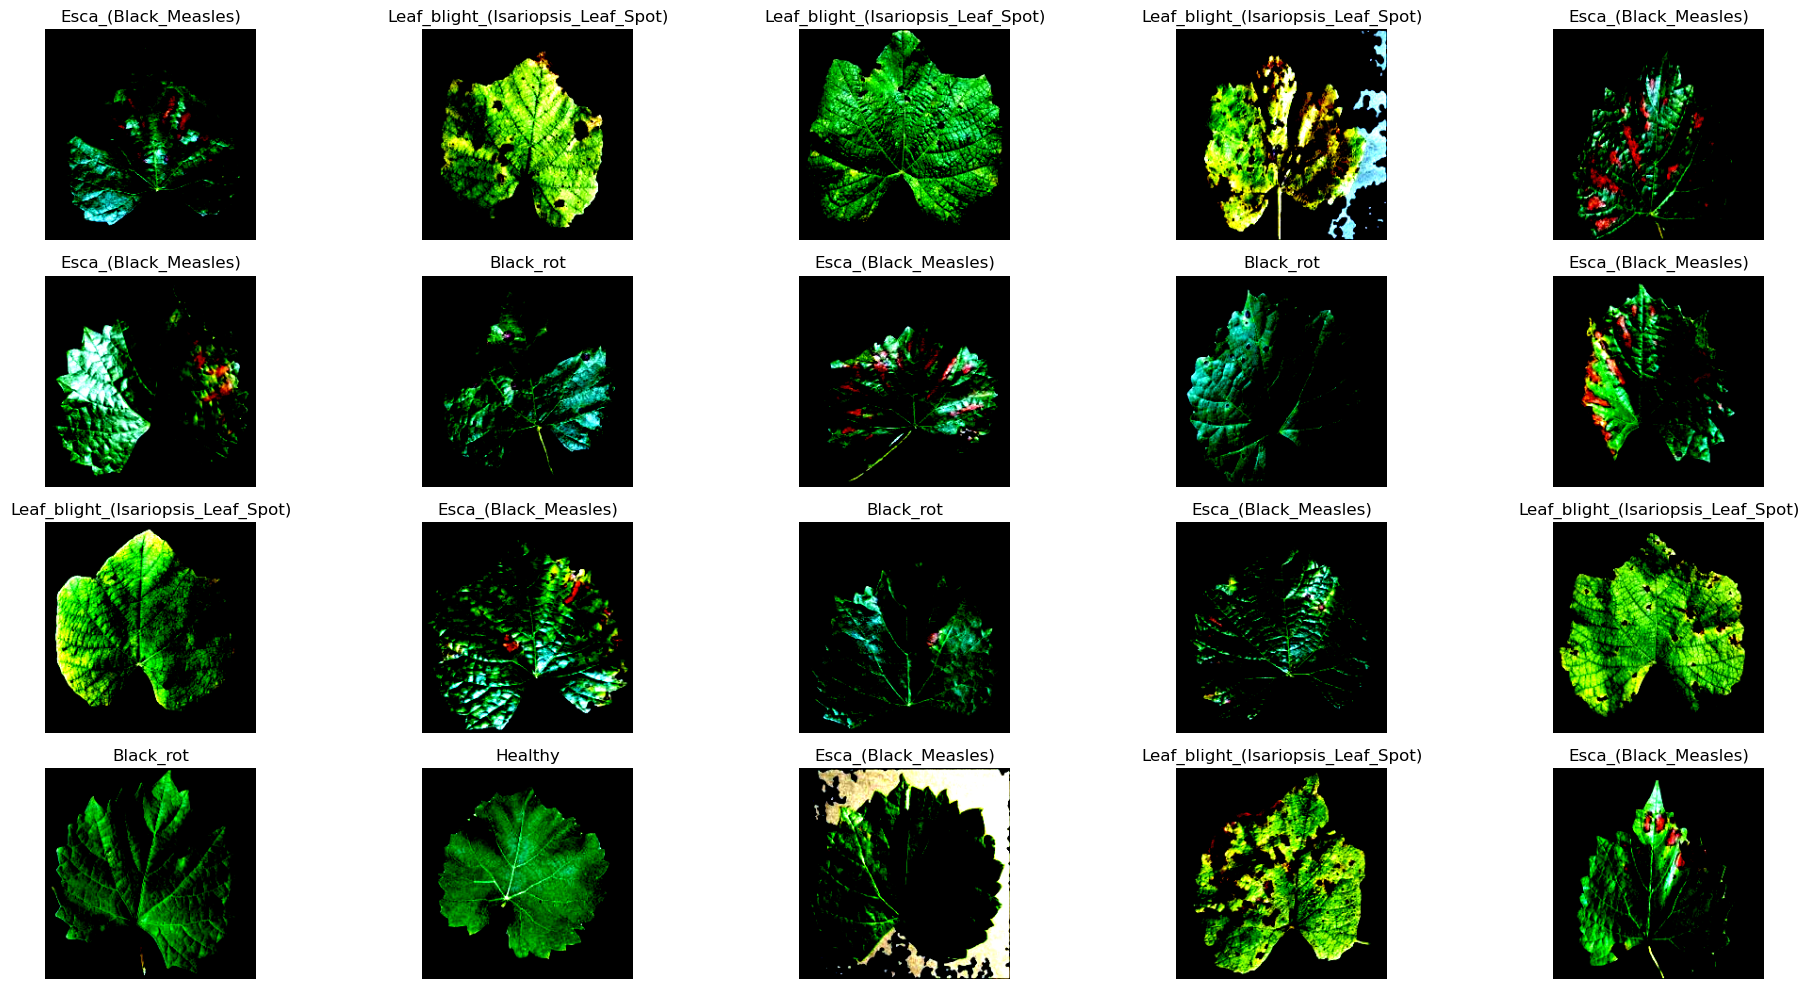

In [7]:
# Define the number of random images to generate
num_random_images = 20

# Get class names
class_names = train_dataset.classes

# Plot random images with their class labels
plt.figure(figsize=(20, 10))
for i in range(num_random_images):
    random_index = random.randint(0, len(train_dataset)-1)
    image, label = train_dataset[random_index]
    plt.subplot(4, 5, i + 1)
    plt.imshow(image.permute(1, 2, 0))  # Convert tensor to numpy array and rearrange dimensions
    plt.title(class_names[label])
    plt.axis('off')
plt.tight_layout()
plt.show()

**ploting first 5 images of each class in test dataset**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

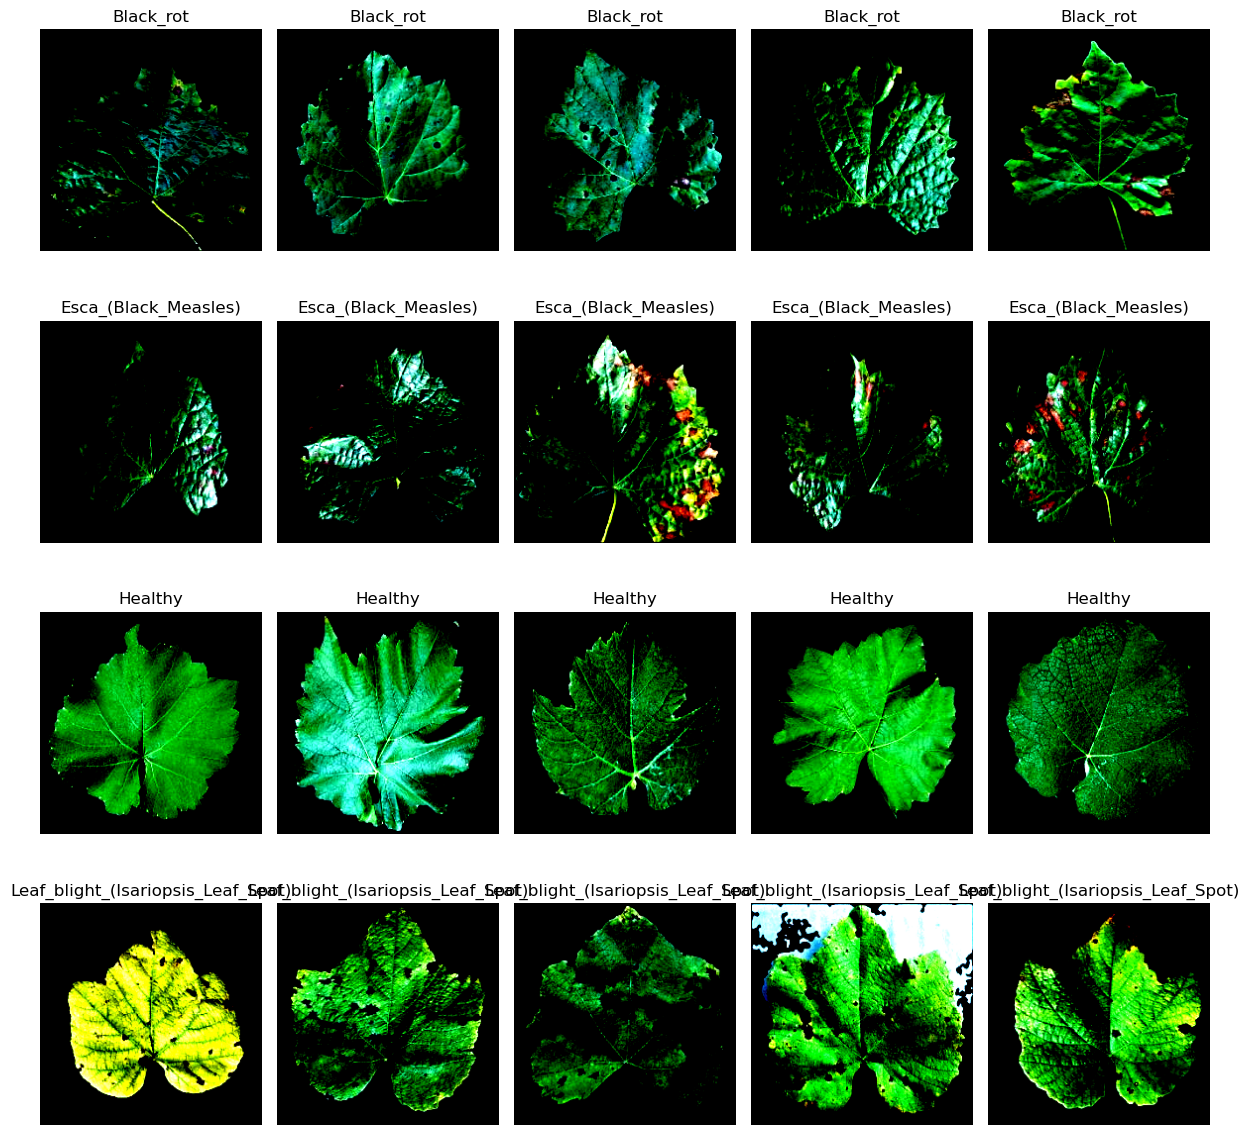

In [8]:
# Function to plot images
def plot_images(dataset, class_names):
    fig, axs = plt.subplots(nrows=len(class_names), ncols=5, figsize=(12, 12))
    for i, class_name in enumerate(class_names):
        class_indices = [idx for idx, label in enumerate(dataset.targets) if label == i]
        for j in range(5):
            img, _ = dataset[class_indices[j]]
            axs[i, j].imshow(img.permute(1, 2, 0))  # Convert from tensor to numpy array and rearrange dimensions
            axs[i, j].set_title(class_name)
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Get class names
class_names = test_dataset.classes

# Plot the first 5 images of each class
plot_images(test_dataset, class_names)

**randomly generating images of training dataset**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

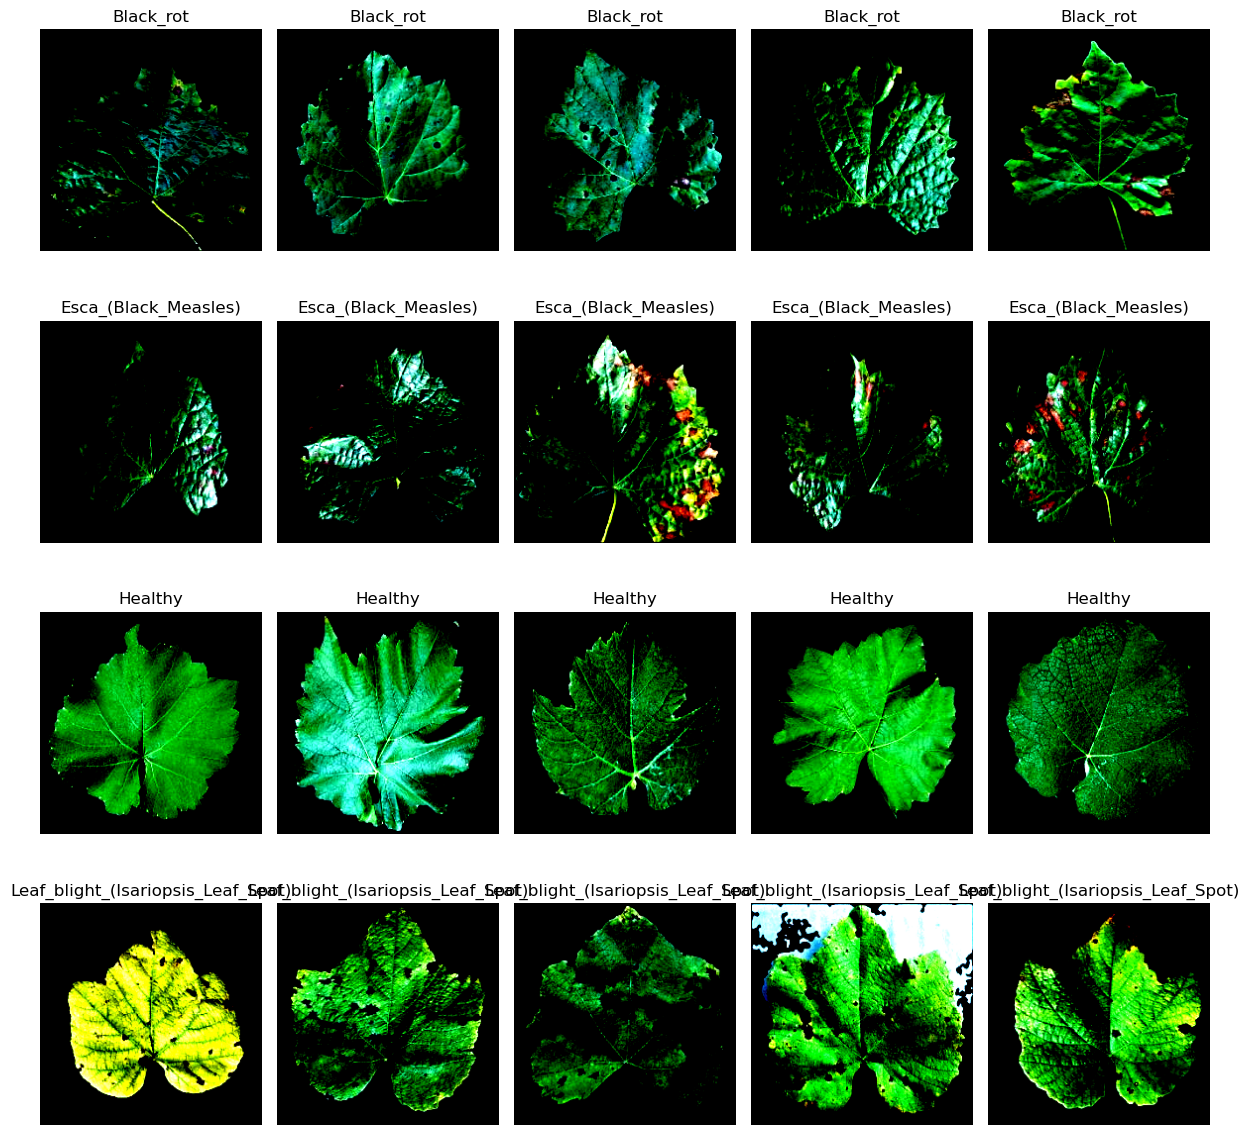

In [9]:
# Get class names
class_names = test_dataset.classes

# Initialize counters for each class
class_counters = {class_name: 0 for class_name in class_names}

# Initialize a dictionary to store the first 5 images for each class
first_images = {class_name: [] for class_name in class_names}

# Iterate through the test dataset to find the first 5 images for each class
for image, label in test_dataset:
    class_name = class_names[label]
    if class_counters[class_name] < 5:
        first_images[class_name].append(image)
        class_counters[class_name] += 1

# Plot the first 5 images for each class
fig, axs = plt.subplots(nrows=len(class_names), ncols=5, figsize=(12, 12))
for i, class_name in enumerate(class_names):
    for j in range(5):
        axs[i, j].imshow(first_images[class_name][j].permute(1, 2, 0))  # Convert from tensor to numpy array and rearrange dimensions
        axs[i, j].set_title(class_name)
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()


# MODEL

### using CNN for model deployment

In [10]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc = nn.Linear(32 * 56 * 56, num_classes)
        self.pool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = self.fc(x)
        return x

# Initialize the model
model = SimpleCNN(num_classes=len(train_dataset.classes))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define number of epochs
num_epochs = 10

# Model training
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print('Finished Training')


Epoch [1/10], Loss: 0.8352
Epoch [2/10], Loss: 0.2162
Epoch [3/10], Loss: 0.1318
Epoch [4/10], Loss: 0.0571
Epoch [5/10], Loss: 0.0595
Epoch [6/10], Loss: 0.0328
Epoch [7/10], Loss: 0.0118
Epoch [8/10], Loss: 0.0054
Epoch [9/10], Loss: 0.0025
Epoch [10/10], Loss: 0.0016
Finished Training


## Hyper-parameter tuning for better accuracy and less loss

In [11]:
# Define your CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        # Define your convolutional layers, pooling layers, and fully connected layers here
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  # Adjust input size based on your CNN architecture
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Define the forward pass of your model
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define hyperparameters
learning_rate = 0.001
num_epochs = 10

# Initialize the model
model = CNNModel(num_classes=len(train_dataset.classes))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    return correct / total

# Function for model training
def train_model(model, criterion, optimizer, train_loader, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_accuracy = 0.0
        for i, (images, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track loss and accuracy
            running_loss += loss.item()
            running_accuracy += calculate_accuracy(outputs, labels)

#             if (i+1) % 100 == 0:
#                 print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}, Accuracy: {calculate_accuracy(outputs, labels):.4f}')
# #At every 100 steps, the loss and accuracy are printed.

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = running_accuracy / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Train the model
train_model(model, criterion, optimizer, train_loader, num_epochs)


Epoch [1/10], Step [100/101], Loss: 0.5134, Accuracy: 0.7812
Epoch [1/10], Loss: 1.2755, Accuracy: 0.7350
Epoch [2/10], Step [100/101], Loss: 0.2441, Accuracy: 0.9062
Epoch [2/10], Loss: 0.2061, Accuracy: 0.9271
Epoch [3/10], Step [100/101], Loss: 0.1265, Accuracy: 0.9062
Epoch [3/10], Loss: 0.1090, Accuracy: 0.9596
Epoch [4/10], Step [100/101], Loss: 0.0543, Accuracy: 0.9688
Epoch [4/10], Loss: 0.0772, Accuracy: 0.9756
Epoch [5/10], Step [100/101], Loss: 0.0120, Accuracy: 1.0000
Epoch [5/10], Loss: 0.0275, Accuracy: 0.9938
Epoch [6/10], Step [100/101], Loss: 0.0023, Accuracy: 1.0000
Epoch [6/10], Loss: 0.0077, Accuracy: 0.9978
Epoch [7/10], Step [100/101], Loss: 0.0003, Accuracy: 1.0000
Epoch [7/10], Loss: 0.0015, Accuracy: 1.0000
Epoch [8/10], Step [100/101], Loss: 0.0007, Accuracy: 1.0000
Epoch [8/10], Loss: 0.0008, Accuracy: 1.0000
Epoch [9/10], Step [100/101], Loss: 0.0001, Accuracy: 1.0000
Epoch [9/10], Loss: 0.0005, Accuracy: 1.0000
Epoch [10/10], Step [100/101], Loss: 0.0001, A

**Overall, the loss decreases and accuracy increases as the model continues to train over the epochs, which indicates that the model is learning and improving its performance on the training dataset. The model achieves very high accuracy by the end of training, suggesting that it has effectively learned to classify the images in the training dataset.**

In [12]:
def evaluate_model(model, criterion, test_loader):
    model.eval()  # Set model to evaluation mode
    total_loss = 0.0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(test_loader)
    accuracy = total_correct / total_samples

    print(f'Average Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')


In [13]:
#model evaluation
evaluate_model(model, criterion, test_loader)

Average Loss: 0.3012, Accuracy: 0.9341


In [14]:
# Save the trained model using pickle
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)
#pickle file will be created as trained_model in path

In [15]:
# Load the trained model from the file
with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [16]:
loaded_model

CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200704, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

# Find accuracy of the model

In [17]:
# Set the model to evaluation mode
loaded_model.eval()

# List to store predicted labels
predicted_labels = []
true_labels = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = loaded_model(images)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Convert predicted and true labels to numpy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compare predicted and true labels
accuracy = (predicted_labels == true_labels).mean()
print(f"Accuracy on the test dataset: {accuracy:.4f}")


Accuracy on the test dataset: 0.9341


### visualizing prediction and truth

In [18]:
# # Replace these with your predicted and true labels
# predicted_labels = np.array(predicted_labels)
# true_labels = np.array(true_labels)

# # Create a figure with subplots
# fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# # Line plot
# axs[0, 0].plot(range(len(predicted_labels)), predicted_labels, label='Predicted Labels', color='blue')
# axs[0, 0].plot(range(len(true_labels)), true_labels, label='True Labels', color='red')
# axs[0, 0].set_title('Line Plot')
# axs[0, 0].legend()

# # Bar plot
# unique_labels, counts = np.unique(predicted_labels, return_counts=True)
# axs[0, 1].bar(unique_labels, counts, color='blue', label='Predicted Labels')
# unique_labels, counts = np.unique(true_labels, return_counts=True)
# axs[0, 1].bar(unique_labels, counts, color='red', label='True Labels')
# axs[0, 1].set_title('Bar Plot')
# axs[0, 1].legend()

# # Scatter plot
# axs[1, 0].scatter(range(len(predicted_labels)), predicted_labels, color='blue', label='Predicted Labels')
# axs[1, 0].scatter(range(len(true_labels)), true_labels, color='red', label='True Labels')
# axs[1, 0].set_title('Scatter Plot')
# axs[1, 0].legend()

# # Box plot
# axs[1, 1].boxplot([predicted_labels, true_labels], labels=['Predicted Labels', 'True Labels'])
# axs[1, 1].set_title('Box Plot')

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()


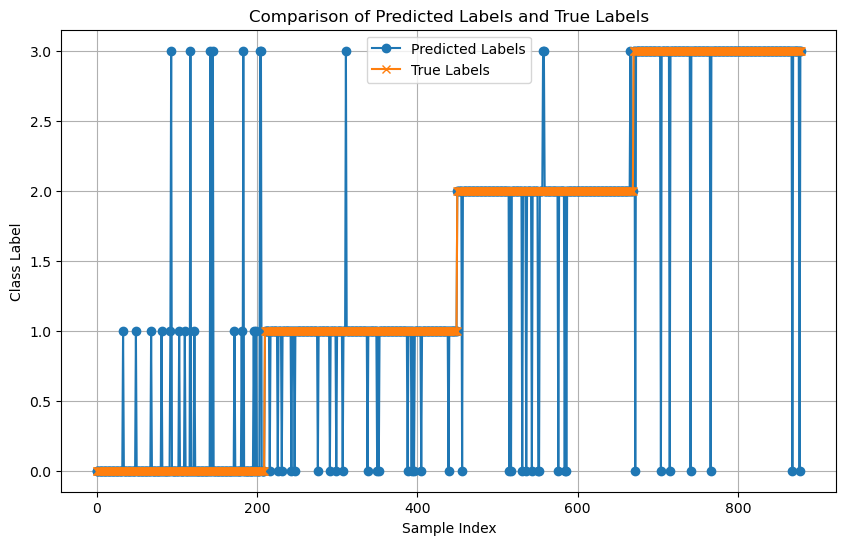

In [19]:
# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(predicted_labels)), predicted_labels, label='Predicted Labels', marker='o')
plt.plot(range(len(true_labels)), true_labels, label='True Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Comparison of Predicted Labels and True Labels')
plt.legend()
plt.grid(True)
plt.show()


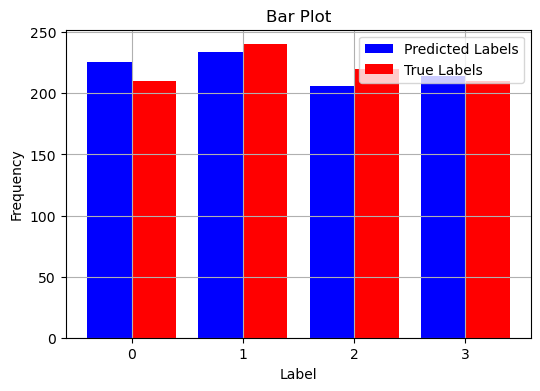

In [20]:
# Bar plot
unique_labels, counts_predicted = np.unique(predicted_labels, return_counts=True)
unique_labels, counts_true = np.unique(true_labels, return_counts=True)
plt.figure(figsize=(6, 4))
plt.bar(unique_labels - 0.2, counts_predicted, width=0.4, color='blue', label='Predicted Labels')
plt.bar(unique_labels + 0.2, counts_true, width=0.4, color='red', label='True Labels')
plt.title('Bar Plot')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(unique_labels)
plt.legend()
plt.grid(True)
plt.show()

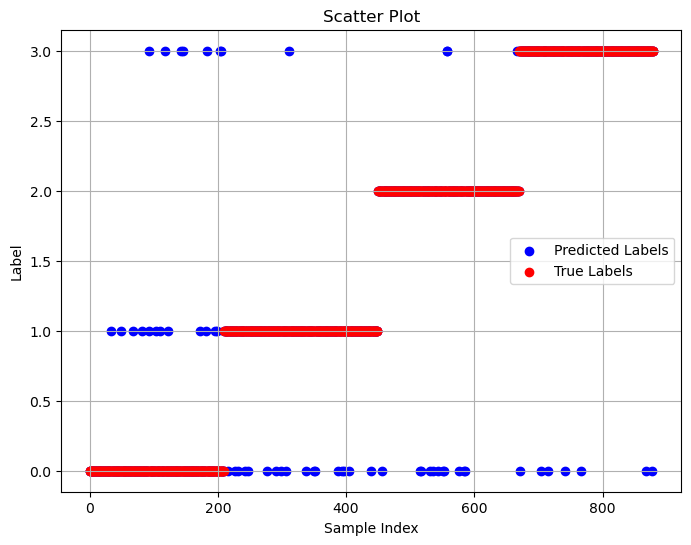

In [21]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(predicted_labels)), predicted_labels, color='blue', label='Predicted Labels')
plt.scatter(range(len(true_labels)), true_labels, color='red', label='True Labels')
plt.title('Scatter Plot')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.show()

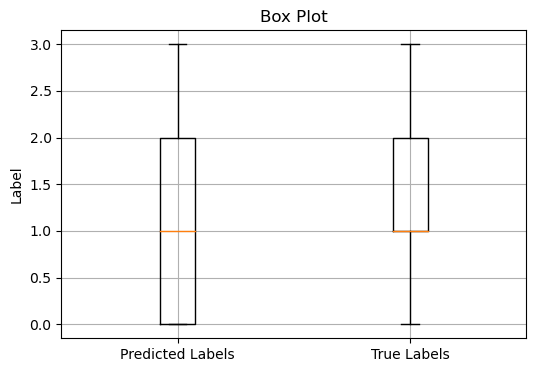

In [22]:
# Box plot
plt.figure(figsize=(6, 4))
plt.boxplot([predicted_labels, true_labels], labels=['Predicted Labels', 'True Labels'])
plt.title('Box Plot')
plt.ylabel('Label')
plt.grid(True)
plt.show()

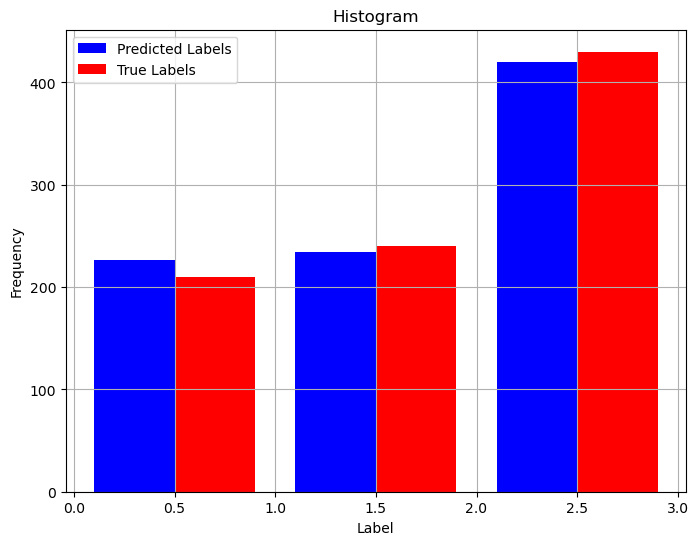

In [23]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist([predicted_labels, true_labels], bins=range(min(min(predicted_labels), min(true_labels)), 
                                                     max(max(predicted_labels), max(true_labels)) + 1),
         color=['blue', 'red'], label=['Predicted Labels', 'True Labels'])
plt.title('Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# EVALUATING MODEL 
***checking model where it went wrong***

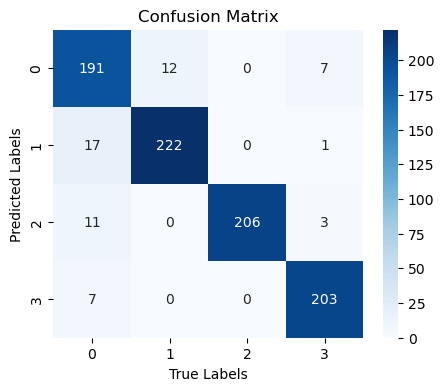

In [24]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


# predicting test dataset

In [25]:
import torch

# List to store predicted labels
all_predicted_labels = []

# Set the model to evaluation mode
loaded_model.eval()

# Disable gradient calculation
with torch.no_grad():
    for images, _ in test_loader:
        # Forward pass
        outputs = loaded_model(images)
        _, predicted = torch.max(outputs, 1)
        all_predicted_labels.extend(predicted.tolist())

# Convert the list of predicted labels to a numpy array
all_predicted_labels = np.array(all_predicted_labels)


In [26]:
all_predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [27]:
len(all_predicted_labels)

880

# MODEL DEPLOYMENT IN REALTIME ENVIRONMENT

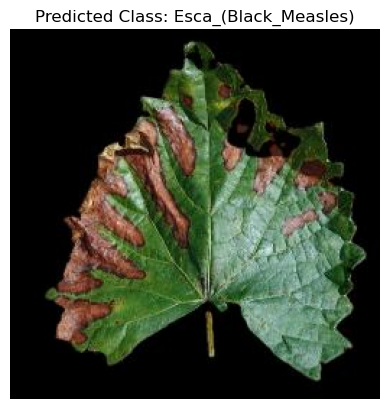

In [28]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# Load and preprocess the new image
image_path = "C:/Users/chara/Desktop/grape_disease_detection_and_pestiside_recommendation/model_deployment/07d611f9-f24f-49ff-a026-912617834d87___FAM_B.Msls 1069_final_masked.jpg" 
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size expected by the model
    transforms.ToTensor(),           # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Set the model to evaluation mode
loaded_model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Forward pass
    outputs = loaded_model(image_tensor)
    _, predicted = torch.max(outputs, 1)

# Convert predicted label index to class name
predicted_class = class_labels[predicted.item()]

# Display the image along with the predicted class
plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()


# PESTISIDE RECOMMENDATION

In [29]:
predicted_class

'Esca_(Black_Measles)'

In [30]:
predicted.item()

1

In [31]:
recommendations = {
    "Black Rot": "Myclobutanil fungiside",
    "ESCA(Black Measles)": "kocide 3000(copper fungiside), Cuprofix Ultra 40 Disperss",
    "Healthy": "Maintain overall health through proper cultural practices",
    "Leaf blight (Isariopsis Leaf Spot)": "Chlorothalonil, Mancozeb"
}

In [32]:
if predicted.item() == 0:
    print(f'Disease: {class_labels[predicted.item()]}, \nPesticide recommendation: {recommendations["Black Rot"]}')
elif predicted.item() == 1:
    print(f'Disease: {class_labels[predicted.item()]}, \nPesticide recommendation: {recommendations["ESCA(Black Measles)"]}')
elif predicted.item() == 2:
    print(f'Disease: {class_labels[predicted.item()]}, \nPesticide recommendation: {recommendations["Healthy"]}')
else:
    print(f'Disease: {class_labels[predicted.item()]}, \nPesticide recommendation: {recommendations["Leaf blight (Isariopsis Leaf Spot)"]}')


Disease: Esca_(Black_Measles), 
Pesticide recommendation: kocide 3000(copper fungiside), Cuprofix Ultra 40 Disperss
